# preprocessing demo

This is a demo showing usage of preprocessing module.

In [1]:
%matplotlib inline
from __future__ import division, print_function, absolute_import
import h5py
import numpy as np
import matplotlib.pyplot as plt
import early_vision_toolbox.preprocessing as preprocessing  
import imagen as ig
# %load_ext holoviews.ipython
import matplotlib
# hackback due to holoviews. check <https://github.com/ioam/imagen/issues/48>
%matplotlib inline

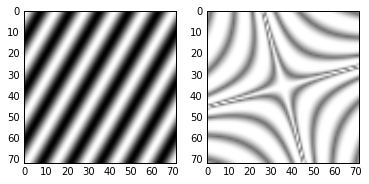

In [2]:
# first, draw some stuff. let's say, one sine grating, and one hyperbolic grating.
im1 = ig.SineGrating(xdensity=72, ydensity=72, frequency=6, phase=np.pi/2, orientation=np.pi/3)()
im2 = ig.HyperbolicGrating(xdensity=72, ydensity=72, size=0.18, thinkness=0.015, orientation=np.pi/3)()
plt.close('all')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im1, cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(im2, cmap='gray', vmin=0, vmax=1)
plt.show()

## clipping central patch

In [3]:
# then create steps and steps params to extract centers.
steps = ['sampling']
steps_pars = {'sampling': {'type': 'clip',
                           'patchsize': 16,
                          'clip_origin': 'center'}}
extract_center_pipeline, final_pars = preprocessing.bw_image_preprocessing_pipeline(steps=steps, pars=steps_pars)
print(final_pars)

{'sampling': {'clip_offset': (0, 0), 'random_seed': 0, 'grid_gridsize': (None, None), 'grid_origin': 'center', 'clip_origin': 'center', 'random_numpatch': None, 'grid_spacing': None, 'clip_random_maxjitter': None, 'type': 'clip', 'random_buff': 4, 'clip_random': False, 'patchsize': 16, 'clip_random_numpatch': None, 'random_pixelshiftx': 0, 'grid_order': 'C'}}


### result

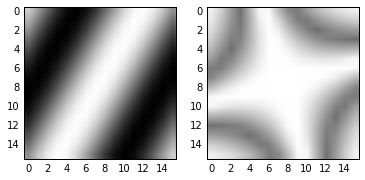

In [4]:
images_clipped = extract_center_pipeline.transform([im1, im2])
assert images_clipped.shape == (2, 16, 16)

# check that it's indeed the central part.
central_part_index = slice(36-8,36+8)
assert np.array_equal(im1[central_part_index,central_part_index], images_clipped[0])
assert np.array_equal(im2[central_part_index,central_part_index], images_clipped[1])

plt.close('all')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(images_clipped[0], cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(images_clipped[1], cmap='gray', vmin=0, vmax=1)
plt.show()

## clipping grid

Now we clip a 6x6 grid, each taking 12 pixels from each image.

In [5]:
# then create steps and steps params to extract centers.
steps = ['sampling']
steps_pars = {'sampling': {'type': 'grid',
                           'patchsize': 12,
                          'grid_origin': 'center',
                          'grid_spacing': 12,
                          'grid_gridsize': (6,6)}}
extract_center_pipeline, final_pars = preprocessing.bw_image_preprocessing_pipeline(steps=steps, pars=steps_pars)
print(final_pars)

{'sampling': {'clip_offset': (0, 0), 'random_seed': 0, 'grid_gridsize': (6, 6), 'grid_origin': 'center', 'clip_origin': 'center', 'random_numpatch': None, 'grid_spacing': 12, 'clip_random_maxjitter': None, 'type': 'grid', 'random_buff': 4, 'clip_random': False, 'patchsize': 12, 'clip_random_numpatch': None, 'random_pixelshiftx': 0, 'grid_order': 'C'}}


## result

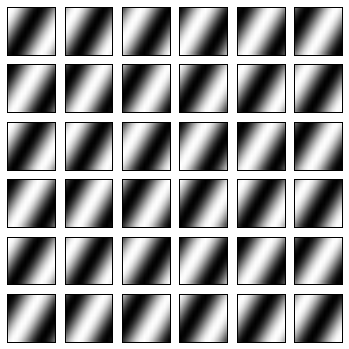

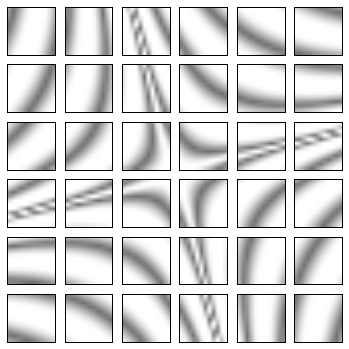

In [6]:
images_grid = extract_center_pipeline.transform([im1, im2])
assert images_grid.shape == (72, 12, 12)

# check that it can be the whole image can be recovered.
img1patches = images_grid[:36]
img2patches = images_grid[36:]

def reconstruct_image(patches):
    row_list = []
    for i_row in range(6):
        slice_to_work_on = slice(i_row*6,(i_row+1)*6)
        patches_this_row = patches[slice_to_work_on]
        patches_combined_this_row = np.concatenate(patches_this_row, axis=1)
        row_list.append(patches_combined_this_row)

    return np.concatenate(row_list, axis=0)

im1_recon = reconstruct_image(img1patches)
im2_recon = reconstruct_image(img2patches)

assert np.array_equal(im1, im1_recon)
assert np.array_equal(im2, im2_recon)

# let's plot two one by one.
def plot_sub_patches(patches):
    plt.figure(figsize=(6, 6))
    for i, comp in enumerate(patches):
        plt.subplot(6, 6, i + 1)
        plt.imshow(comp.reshape((12,12)), cmap='gray', vmin=0, vmax=1)
        plt.xticks(())
        plt.yticks(())
    plt.show()

plot_sub_patches(img1patches)
plot_sub_patches(img2patches)